# Project 2 NLA Report - Mateusz Dorobek
The goal of this project is to discuss some common applicaiions of the SVD decomposition.

-----------
# Least Squares method

Least squares is a method to approximate solution in over-determined system, where:
$
A \in {\rm I\!R}^{mxn}, 
b \in {\rm I\!R}^{m}, 
m \geq n, 
x_{LS} \in {\rm I\!R}^{n}
$
such that it minimizes: 
$
\left\Vert Ax_{LS}-b \right\Vert _2.
$
In this excersize I used two method of factorization (OR and SVD) to solve the Least Squares problem. Each time I'll test two datasets: `dades.txt` and `dades_regressio.csv`, which coresponds to full rank and rank defficient problem.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg as sc

In [2]:
def load_data_task1():
    dades = pd.read_csv("dades.txt", header=None, sep="   ", engine="python").values
    A = dades[:, 0]
    b = dades[:, 1]
    return A, b


def load_data_task2():
    dades_regressio = pd.read_csv("dades_regressio.csv", header=None).values
    A = dades_regressio[:, :-1]
    b = dades_regressio[:, -1]
    return A, b


def plot_data1(A, solution, b):
    A_sorted, b_sorted = zip(*sorted(zip(A, b)))
    plt.plot(A_sorted, b_sorted)
    A_sorted, solution_sorted = zip(*sorted(zip(A, solution)))
    plt.plot(A_sorted, solution_sorted)
    plt.gcf().set_size_inches(2, 1)
    plt.show()


def generate_poly_matrix(A, dim):
    assert isinstance(dim, int)
    assert dim > 0
    return np.vstack([A ** d for d in range(dim)]).T


def least_squares_qr(A, b, plot=1):
    Q, R = np.linalg.qr(A)
    rank = min(R.shape)
    m, n = A.shape
    assert A.shape[0] == b.shape[0]
    assert A.shape[0] >= A.shape[1]
    y = Q.T @ b
    y1 = y[:n]
    y2 = y[n:]
    R1 = R[:n, :n]
    x = sc.solve_triangular(R1, y1)
    v = np.zeros(n - rank)
    x_qr = np.concatenate((x, v))
    if plot:
        plot_data1(A[:, 1], A @ x, b)
    return x_qr


def least_squares_svd(A, b, plot=1):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n = A.shape[1]
    S[S < 1e-5] = 0
    r = np.sum(S > 0)
    S = np.hstack([1 / S[:r], np.zeros(n - r)])
    A_plus = (V.T * S).dot(U.T)
    x_svd = A_plus.dot(b)
    if plot:
        plot_data1(A[:, 1], A @ x_svd, b)
    return x_svd

## Full Rank Matrix

Dim = 2


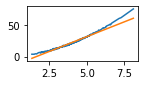

	Error SVD = 37.1145797311177


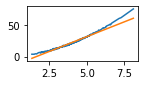

	Error QR = 37.11457973111771
----------------------------------------
Dim = 3


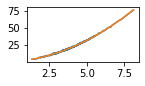

	Error SVD = 10.880828401852192


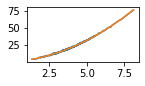

	Error QR = 10.88082840185219
----------------------------------------
Dim = 4


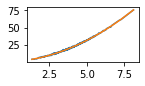

	Error SVD = 10.880500221616828


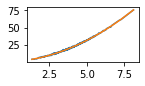

	Error QR = 10.880500221616828
----------------------------------------
Dim = 5


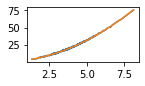

	Error SVD = 10.873692595264195


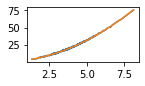

	Error QR = 10.873692595264194
----------------------------------------
Error SVD = 10.873692595264195
Norm(x_svd) = 2.347791513076133
Error QR = 10.873692595264194
Norm(x_qr) = 2.3477915130765927
Error SVD - Error QR = 1.7763568394002505e-15
Norm(x_svd-x_qr) = 6.951524661147564e-13


In [19]:
# np.set_printoptions(precision=10, suppress=False)
A, b = load_data_task1()
for dim in range(2, 6):
    print("Dim =", dim)
    A_poly = generate_poly_matrix(A, dim)
    x_svd = least_squares_svd(A_poly, b)
    print("\tError SVD =", np.linalg.norm(A_poly.dot(x_svd) - b))
    x_qr = least_squares_qr(A_poly, b)
    print("\tError QR =", np.linalg.norm(A_poly.dot(x_qr) - b))
    print("-" * 40)
    
    
print("Error SVD =", np.linalg.norm(A_poly.dot(x_svd) - b))
print("Norm(x_svd) =", np.linalg.norm(x_svd))
print("Error QR =", np.linalg.norm(A_poly.dot(x_qr) - b))
print("Norm(x_qr) =", np.linalg.norm(x_qr))
print("Error SVD - Error QR =", np.linalg.norm(A_poly.dot(x_svd) - b) - np.linalg.norm(A_poly.dot(x_qr) - b))
print("Norm(x_svd-x_qr) =", np.linalg.norm(x_svd-x_qr))

## Comment:
We can see that both methods gives similar solutions for full rank problem. The have similar quality in this task. We can see that dimension of 2 (of polynomial) gives much higher error than dimensions of 3, 4, and so on.

---------
## Not Full Rank Matrix

In [18]:
A, b = load_data_task2()

x_svd = least_squares_svd(A, b, plot=0)
x_qr = least_squares_qr(A, b, plot=0)

print("Error SVD =", round(np.linalg.norm(A.dot(x_svd) - b), 4))
print("Norm(x_svd) =", np.linalg.norm(x_svd))
print("Error QR =", round(np.linalg.norm(A.dot(x_qr) - b), 4))
print("Norm(x_qr) =", np.linalg.norm(x_qr))
print("Error SVD - Error QR =", np.linalg.norm(A.dot(x_svd) - b) - np.linalg.norm(A.dot(x_qr) - b))
print("Norm(x_svd-x_qr) =", np.linalg.norm(x_svd-x_qr))

Error SVD = 1.2548
Norm(x_svd) = 1613.743297980223
Error QR = 1.8051
Norm(x_qr) = 1.2321638024171774e+16
Error SVD - Error QR = -0.5503028197481197
Norm(x_svd-x_qr) = 1.2321638024171774e+16


## Comment:
From results of experiment on not full rank problem we can conclude that both factorisation methods worked quite well, but now the difference is bigger. Norm of the QR factorisation result is huge that means it lacks regularisation, even it has quite good minimization result.

-----------
# Graphics compression

The SVD factorization has the property of giving the best low rank approximation matrix
with respect to the Frobenius and the 2-norm to a given matrix. 

Let
$ A_k=\sum_{j=1}^k \sigma_ju_jv^T_j $
where $u_j$ and $v_{i}$ denote the $i$th column of $U$ and $V$. For any matrix B of rank at most k:

$\|A-A_k\|_{F} \leq \|A-B\|_{F}$

Let B minimize $\|A-B\|_{F}^2$ among all rank $k$ or less matrices. Let $V$ be the space
spanned by the rows of $B$. The dimension of $V$ is at most $k$. Since $B$ minimizes $\|A-B\|_{F}^2$
it must be that each row of $B$ is the projection of the corresponding row of $A$ onto $V$, otherwise replacing the row of $B$ with the projection of the corresponding row of $A$ onto
$V$ does not change $V$ and hence the rank of $B$ but would reduce $\|A-B\|_{F}^2$ is
the sum of squared distances of rows of $A$ to $V$. Since $A_k$ minimizes the sum of squared
distance of rows of $A$ to any $k$-dimensional subspace, it follows that
$\|A-A_k\|_{F} \leq \|A-B\|_{F}$.

To proof the $2$-norm has the same properity we state following equation:

$\|A-A_k\|_{2} =  \bigg\| \sum_{j=k+1}^n \sigma_ju_jv^T_j \bigg\|_{2} = \sigma_{k+1}$

Therefore, we need to show that if $ B_{k}=UV^{\top }$  where $U \in $ and $V$ have $k$ columns then $ \|A-A_k\|_{2} = \sigma_{k+1} \leq \|A-B_k\|_{2} $.

Since $V$ has $k$ columns, then there must be a linear combination of the first $k+1$ columns of $V$,  $ w=\gamma _{1}v_{1}+\cdots +\gamma _{k+1} v_{k+1} $.

such that $ Y^{\top }w=0$. Without loss of generality, we can scale $ w$ so that $ \|w\|_{2}=1$ or (equivalently) $ \gamma _{1}^{2}+\cdots +\gamma _{k+1}^{2}=1$. Therefore,

$\|A-B_{k}\|_{2}^{2}\geq \|(A-B_{k})w\|_{2}^{2}=\|Aw\|_{2}^{2}=\gamma _{1}^{2}\sigma _{1}^{2}+\gamma _{2}^{2}\sigma _{2}^{2}+\cdots +\gamma _{k+1}^{2}\sigma _{k+1}^{2}\geq \sigma _{k+1}^{2}$

This prooves SVD factorization to have the property of giving the best low rank approximation matrix with respect to the Frobenius and the 2-norm to a given matrix.

Using this property I performed image compression using SVD decomposition. 

Image: cat , Size: 128 x 128
k: 1 error: 0.1402


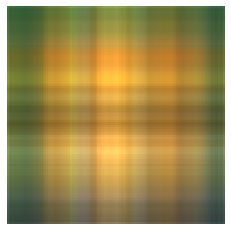

k: 4 error: 0.0648


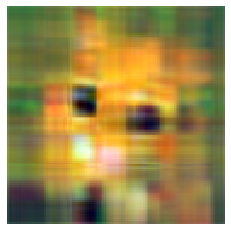

k: 10 error: 0.0286


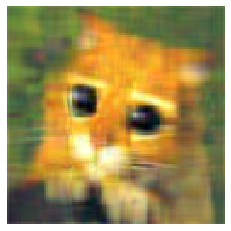

k: 30 error: 0.0089


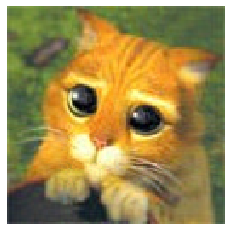

k: 100 error: 0.0003


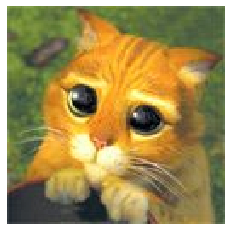

Image: sagrada , Size: 256 x 256
k: 1 error: 0.1266


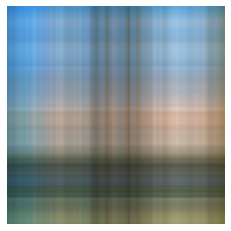

k: 4 error: 0.0493


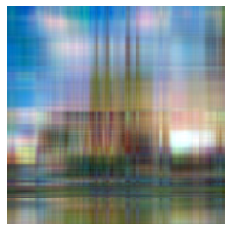

k: 10 error: 0.0251


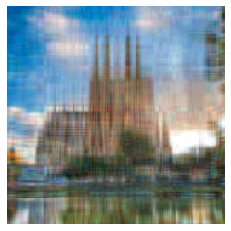

k: 30 error: 0.0103


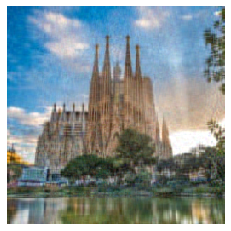

k: 100 error: 0.0023


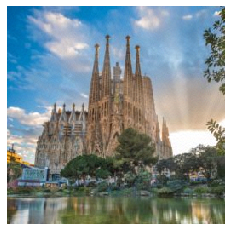

Image: gal , Size: 568 x 834
k: 1 error: 0.1857


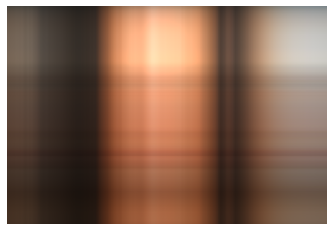

k: 4 error: 0.0455


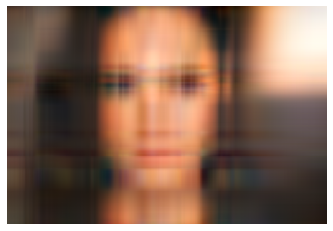

k: 10 error: 0.0177


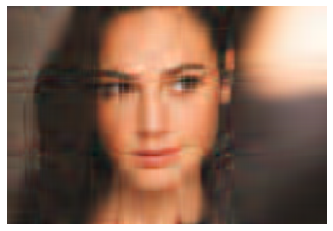

k: 30 error: 0.0044


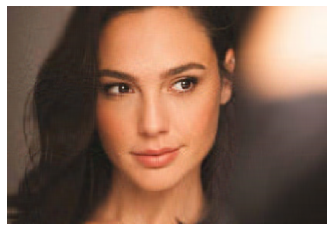

k: 100 error: 0.0009


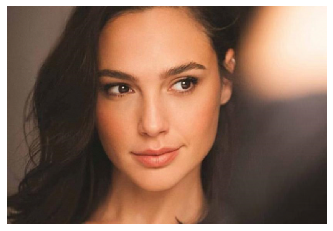

In [22]:
def clip(img):
    img[img < 0] = 0
    img[img > 1] = 1
    return img


def compress(img, k):
    U, S, V = np.linalg.svd(img, full_matrices=False)
    img_compressed = U[:, :k] @ (np.diag(S[:k]) @ V[:k, :])
    error = np.linalg.norm(img - img_compressed, ord=2) / np.linalg.norm(img, ord=2)
    return img_compressed, error


def save_images(img, k, name):
    out_img = np.zeros(img.shape)
    total_error = 0
    for i in range(4):
        tmp_img, error = compress(img[:, :, i], k)
        out_img[:, :, i] = tmp_img
        total_error += error
    total_error = str(round(total_error / out_img.shape[2], 4))

    clipped_img = clip(out_img)
    print("k:", k, "error:", total_error)
    plt.imsave("compressed/" + name + "_" + total_error + ".png", clipped_img)
    plt.axis("off")
    plt.imshow(clipped_img)
    plt.show()

for name in ["cat", "sagrada", "gal"]:
    img = plt.imread("images/" + name + ".png")
    print("Image:", name, ", Size:", img.shape[0], "x", img.shape[1])
    for k in [1, 4, 10, 30, 100]:
        save_images(img, k, name)

## Comment
Bigger k results in better quality of compression, with smaller error. With decrease of Frobenius norm more information is preserved from original imageresulting in better compression quality.






---------------------
# Principal Component Analysis

PCA is technique that reduces dimensions of data by finding its main components with reduced loss of information.

In first task I've calculated PCA using covariance and corralation matrix. 

In [88]:
def pca_covariance(x, n=None):
    if n is None:
        n = x.shape[0]
    y = x.T / np.sqrt(n - 1)
    U, S, V = np.linalg.svd(y, full_matrices=False)
    return S**2, V


def pca_correlation(x, n=None, transpose=False):
    if n is None:
        n = x.shape[0]
    std = np.std(x, axis=0)
    if transpose:
        x = x.T
    x = x / std
    return pca_covariance(x, n)


def load_data_example():
    return pd.read_csv("example.dat", header=None, sep=" ", dtype=float).values


def load_data_RCsGoff():
    data = pd.read_csv("RCsGoff.csv")
    X = data.iloc[:, 1:].values.T
    X = X - np.mean(X, axis=0)
    names = data.columns[1:].values
    return X.T, names 

## Firts Task: example.dat

---------------
## Correlation PCA

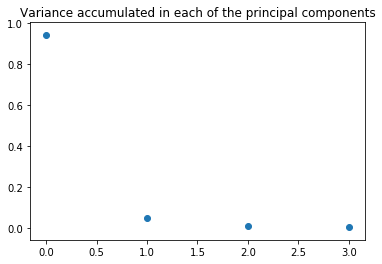

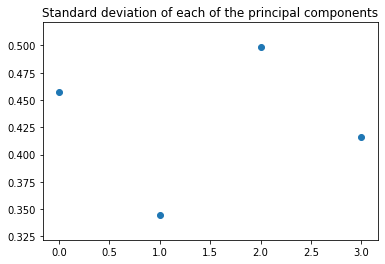

	variance: 
		0.9411133917998936
		0.046581718765646436
		0.009314477917560366
		0.002990411516899796
	std: 
		0.45759095802640654
		0.3447775332273393
		0.49827862323589533
		0.4164821500860359


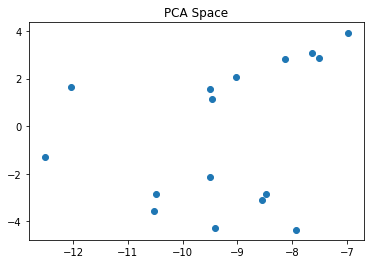

In [124]:
X = load_data_example().T
s2, Vt = pca_correlation(X)

variance = s2 / np.sum(s2)
plt.title("Variance accumulated in each of the principal components")
plt.scatter(range(len(variance)), variance)
plt.show()

std = np.std(Vt, axis=0)
plt.title("Standard deviation of each of the principal components")
plt.scatter(range(len(Vt)), std)
plt.show()

print("\tvariance: ", *variance, sep="\n\t\t")
print("\tstd: ", *std, sep="\n\t\t")


pca_space = np.dot(Vt, X)
plt.title("PCA Space")
plt.scatter(pca_space[0], pca_space[1])
plt.show()


-------------
## Covariance PCA

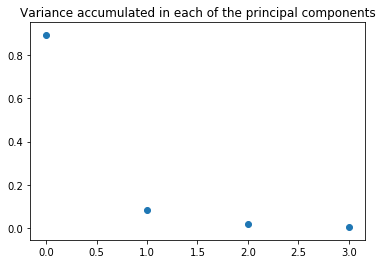

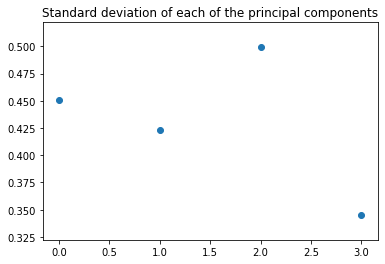

	variance: 
		0.8918837948264754
		0.08499604643886598
		0.01823985062212277
		0.004880308112535808
	std: 
		0.4503267058326211
		0.4229150698060809
		0.4991929040269091
		0.3451885663141795


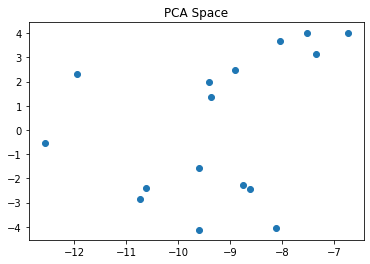

In [123]:
X = load_data_example().T
s2, Vt = pca_covariance(X, 58581)

variance = s2 / np.sum(s2)
plt.title("Variance accumulated in each of the principal components")
plt.scatter(range(len(variance)), variance)
plt.show()

std = np.std(Vt, axis=0)
plt.title("Standard deviation of each of the principal components")
plt.scatter(range(len(Vt)), std)
plt.show()

print("\tvariance: ", *variance, sep="\n\t\t")
print("\tstd: ", *std, sep="\n\t\t")

pca_space = np.dot(Vt, X)
plt.title("PCA Space")
plt.scatter(pca_space[0], pca_space[1])
plt.show()

## Comment
Covariance First component has smaller variation in comparition to PCA from corralation matrix.

-------------
## Second task: data_RCsGoff

Here I'll perform PCA analysis using covariance matrix and generate required output file.

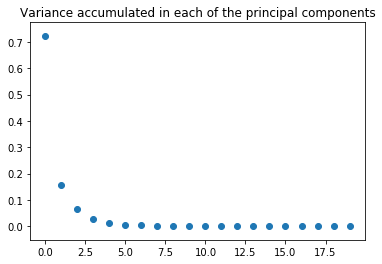

In [127]:
X, sample_names = load_data_RCsGoff()
s2, Vt = pca_covariance(X, 58581)

variance = s2 / np.sum(s2)
plt.title("Variance accumulated in each of the principal components")
plt.scatter(range(len(variance)), variance)
plt.show()

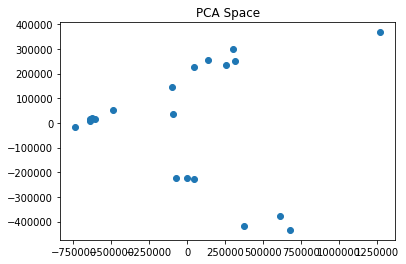

In [128]:
pca_space = np.dot(Vt, X)
plt.title("PCA Space")
plt.scatter(pca_space[0], pca_space[1])
plt.show()

## Comment
In PCA SPACE figure we can see how dependant are first and secondcomponents (73% and 16% of data variance).
As we can see they are partially correlated, in some parts and different in other parts of chart. Most of variance is in the firs component that may explain this behaviour.

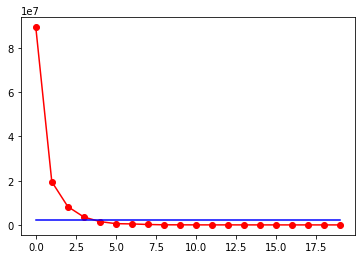

Number of principal components needed to explain the data sets:
Kraiser rule:  19
Scree plot:  4
3/4 of the total variance rule:  2


In [153]:
scree_plot_treshold = 2e6
plt.plot(s2, "ro-")
plt.plot([scree_plot_treshold] * len(s2), "b-")
plt.show()

print("Number of principal components needed to explain the data sets:")
print("Kraiser rule: ", sum(s2 > 1))
print("Scree plot: ", sum(s2 > scree_plot_treshold))
summed_variance = np.array([sum(variance[:idx+1]) for idx in range(len(variance))])
three_fourth_rule = next(idx+1 for idx, sum_var  in enumerate(summed_variance) if sum_var>0.75)
print("3/4 of the total variance rule: ", three_fourth_rule)

- *Kraiser rule* tells to drop all components with eigen value smaller than 1
- *Scree test* tells to drop all components lower than elbow. 
- *3/4 of the total variance rule* tells to choose first n components that acumulative varince is higher or equal than 75% 

## Output:
Output file consist of sample name, 20 principal components and variance accumuleted in them with the following format:

`Sample,PC1,PC2,. . . ,PC20,Variance`

In [ ]:
df = pd.DataFrame(pca_space)
df.insert(0, "name", sample_names, True)
df.insert(len(df.columns), "variance", variance, True) 
df.to_csv("output.txt", index=False, header=False)

# Conclusions

This project explain whatis SVD decomposition and what are its appications. Tensors have a lot of information about subject that its data describes, we just need how to extract and interpret them

Project 2 Numerical Linear Algebra - **Mateusz Dorobek**